In [2]:
import os
import pandas as pd
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')
df.head()


,id,sex,age,smoker,opium,height,weight,bmi,wbc,bili,...,pdcan,sphincterotomy,bal,v39,v40,v41,stent,sucextract,unsucextract,pep
0,109729,1,69.0,0,0,165.0,68.0,25.0,3.4,0.9,...,0,0,0,0,0,0,0,0,0,0
1,109843,1,85.0,0,0,159.0,43.0,17.0,5.0,0.5,...,0,1,0,0,1,0,0,0,0,0
2,109902,0,60.0,0,0,162.0,83.0,32.0,NaN,NaN,...,0,1,0,0,1,0,0,0,0,0
3,110167,1,77.0,0,0,160.0,60.0,23.0,3.2,12.2,...,1,1,0,0,0,1,0,0,0,0
4,110278,0,56.0,1,0,180.0,70.0,22.0,21.0,3.5,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.describe()

,id,sex,age,smoker,opium,height,weight,bmi,wbc,bili,...,pdcan,sphincterotomy,bal,v39,v40,v41,stent,sucextract,unsucextract,pep
count,1190.000000,1190.000000,1177.000000,1190.000000,1190.000000,1141.000000,1142.000000,1140.000000,1128.000000,1058.000000,...,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,149065.316807,0.525210,59.084962,0.189916,0.142017,166.866784,70.520140,25.365789,7.986525,5.128885,...,0.196639,0.903361,0.088235,0.152101,0.571429,0.050420,0.305042,0.673109,0.053782,0.142857
std,20309.034935,0.499574,17.686266,0.392399,0.349214,8.907997,13.925211,4.660226,3.377668,6.375061,...,0.397624,0.295589,0.283756,0.359270,0.495080,0.218902,0.460619,0.469274,0.225681,0.350074
min,109729.000000,0.000000,18.000000,0.000000,0.000000,130.000000,35.000000,11.000000,1.800000,0.300000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133998.250000,0.000000,46.000000,0.000000,0.000000,160.000000,62.000000,22.000000,5.600000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,145843.500000,1.000000,62.000000,0.000000,0.000000,165.000000,70.000000,25.000000,7.300000,2.650000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,170300.500000,1.000000,72.000000,0.000000,0.000000,173.000000,78.000000,28.000000,9.500000,6.400000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,173986.000000,1.000000,98.000000,1.000000,1.000000,195.000000,167.000000,61.000000,25.000000,45.299999,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


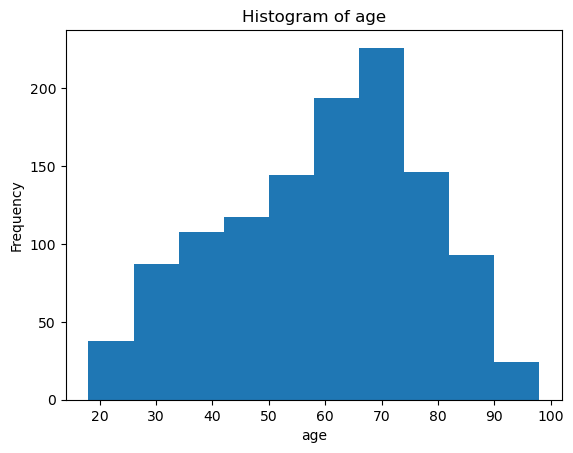

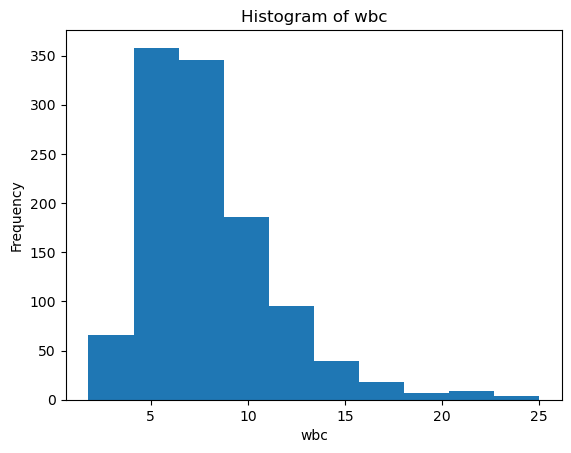

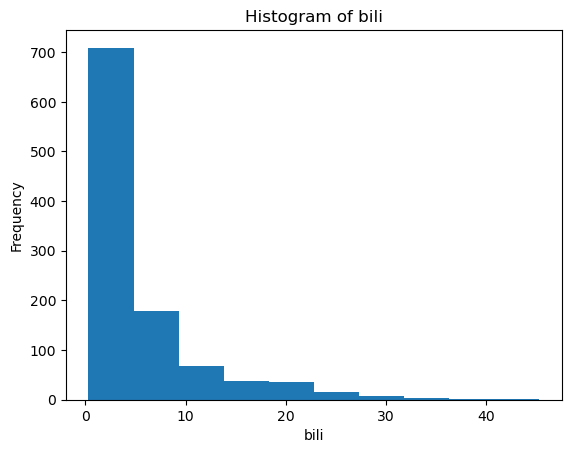

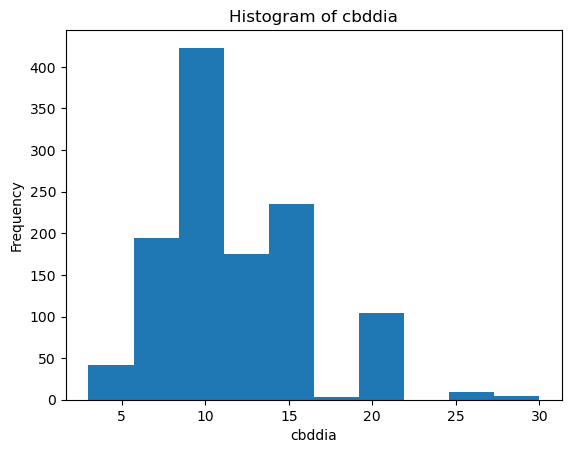

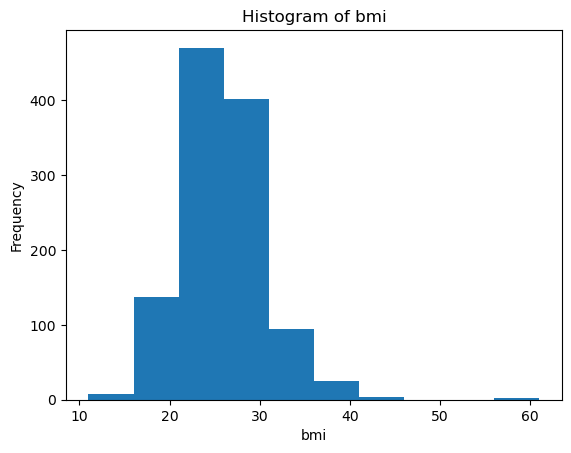

In [4]:
import matplotlib.pyplot as plt
numerical_cols=['age', 'wbc', 'bili','cbddia', 'bmi']
for column in numerical_cols:
  column_data=df[column]
  plt.hist(column_data, bins=10)
  plt.title(f"Histogram of {column}")
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

1- Managing outliers?\
2- With the distribution of bilirubin, it is not better to use log function on it instead of standardizing?Instead of being a continuos feature, it can be dummied as Normal (<1.5) or Abnormal (>1.5).

In [5]:
#As BMI includes both weight and height
df = df.drop(['height', 'weight'], axis=1)
#Imputing for missing variables
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['wbc'] = df['wbc'].fillna(df['wbc'].mean())
df['bili'] = df['bili'].fillna(df['bili'].mean())

#Determining features(X) and label(y)
X = df.drop(['id', 'pep'], axis=1)
y = df['pep']


In [6]:
X.shape, y.shape

((1190, 41), (1190,))

In [7]:
#Splitting to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

In [8]:
#Standardizing numeric variables
from sklearn.preprocessing import StandardScaler
numerical_cols=['age', 'wbc', 'bili','cbddia', 'bmi']
scaler=StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [9]:
X_train.head()

,sex,age,smoker,opium,bmi,wbc,bili,htn,cvd,hypo,...,difcan,pdcan,sphincterotomy,bal,v39,v40,v41,stent,sucextract,unsucextract
214,0,0.524003,0,0,-0.494654,0.828259,-0.290917,0,0,0,...,1,0,1,0,0,1,0,0,1,0
84,1,-1.196722,1,0,-1.568773,0.705827,0.016609,0,0,0,...,0,0,1,0,0,1,0,0,1,0
683,1,0.351930,0,0,1.223935,-0.273624,-0.744922,1,1,0,...,0,0,1,0,0,0,0,1,0,0
677,1,0.179858,0,0,-0.709478,-1.008213,0.785242,0,0,1,...,1,0,1,0,0,1,0,0,1,0
845,0,0.409288,0,0,-0.065007,1.256769,0.802057,0,0,0,...,0,0,1,0,0,0,0,1,1,0


In [21]:
#Assessing a simple LR with no regularization
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix, recall_score, accuracy_score
print('accuracy:',accuracy_score(y_test,lr.predict(X_test)))
print('recall:',recall_score(y_test,lr.predict(X_test)))
print('precision:',precision_score(y_test,lr.predict(X_test)))
print('roc:',roc_auc_score(y_test,lr.predict(X_test)))
print('roc:',confusion_matrix(y_test,lr.predict(X_test)))

accuracy: 0.8543417366946778
recall: 0.0
precision: 0.0
roc: 0.49836601307189543
roc: [[305   1]
 [ 51   0]]


In [22]:
#Assessing a simple LR with strong regularization
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(C=10,penalty='l1', solver='liblinear')
lr.fit(X_train,y_train)
lr.predict(X_test)
from sklearn.metrics import roc_auc_score, precision_score, confusion_matrix, recall_score, accuracy_score
print('accuracy:',accuracy_score(y_test,lr.predict(X_test)))
print('recall:',recall_score(y_test,lr.predict(X_test)))
print('precision:',precision_score(y_test,lr.predict(X_test)))
print('roc:',roc_auc_score(y_test,lr.predict(X_test)))
print('roc:',confusion_matrix(y_test,lr.predict(X_test)))

accuracy: 0.8515406162464986
recall: 0.0196078431372549
precision: 0.25
roc: 0.5049019607843137
roc: [[303   3]
 [ 50   1]]


Applying XGBClassifier

In [23]:
#Cross validation via XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
xgb_model=XGBClassifier()
scores=cross_val_score(xgb_model, X_train, y_train, cv=5)
print ('Cross validation scores:', scores)
print ('Mean accuracy', scores.mean())

Cross validation scores: [0.83233533 0.83233533 0.83832335 0.81325301 0.8313253 ]
Mean accuracy 0.8295144650458119


In [24]:
#Train and test the model
xgb_model.fit(X_train,y_train)
y_pred=xgb_model.predict(X_test)
#Evaluating model performance via different metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score, confusion_matrix, roc_auc_score
print('accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('roc:',roc_auc_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

accuracy: 0.8599439775910365
recall: 0.11764705882352941
precision: 0.5454545454545454
roc: 0.5506535947712418
[[301   5]
 [ 45   6]]


In [26]:
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'learning_rate': [0.001, 0.01,0.05, 0.1, 0.3, 0.6, 1],
    'max_depth': [2, 3, 5, 6, 8],
    'n_estimators': [100, 250, 500],
    'subsample': [0.1,0.4, 0.7, 1.0],
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=200, cv=5, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print('Randomized search best params:', random_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Randomized search best params: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.01}
accuracy: 0.8571428571428571
recall: 0.0
precision: 0.0
roc: 0.5
[[306   0]
 [ 51   0]]


c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [36]:
#Evaluating overfitting
y_train_pred=xgb_model.predict(X_train)
print('accuracy:',accuracy_score(y_train,y_train_pred))
print('recall:',recall_score(y_train,y_train_pred))
print('precision:',precision_score(y_train,y_train_pred))
print('roc:',roc_auc_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

accuracy: 1.0
recall: 1.0
precision: 1.0
roc: 1.0
[[714   0]
 [  0 119]]


The poor performance on the test set is caused by overfitting on the train set!\
As there are 41 features for predicion of PEP, a feature selection may be a good option to confront overfitting

Applying RFE with XGBClassifier

In [27]:
#with 2 features
from sklearn.feature_selection import RFE
rfe= RFE(xgb_model, n_features_to_select=2, verbose=1)
X_train_rfe= rfe.fit_transform(X_train, y_train)
X_test_rfe= rfe.transform(X_test)
xgb_model.fit(X_train_rfe,y_train)
y_pred=xgb_model.predict(X_test_rfe)
print('accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('roc:',roc_auc_score(y_test,y_pred))


Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
#with 8 features
from sklearn.feature_selection import RFE
rfe= RFE(xgb_model, n_features_to_select=8, verbose=1)
X_train_rfe= rfe.fit_transform(X_train, y_train)
X_test_rfe= rfe.transform(X_test)
xgb_model.fit(X_train_rfe,y_train)
y_pred=xgb_model.predict(X_test_rfe)
print('accuracy:',accuracy_score(y_test,y_pred))
print('recall:',recall_score(y_test,y_pred))
print('precision:',precision_score(y_test,y_pred))
print('roc:',roc_auc_score(y_test,y_pred))


Fitting estimator with 41 features.
Fitting estimator with 40 features.
Fitting estimator with 39 features.
Fitting estimator with 38 features.
Fitting estimator with 37 features.
Fitting estimator with 36 features.
Fitting estimator with 35 features.
Fitting estimator with 34 features.
Fitting estimator with 33 features.
Fitting estimator with 32 features.
Fitting estimator with 31 features.
Fitting estimator with 30 features.
Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 fe

Applying RFECV with RandomForestClassifier

In [29]:
#RFECV with RandomForst
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = RandomForestClassifier(n_estimators=500, random_state=14)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 25


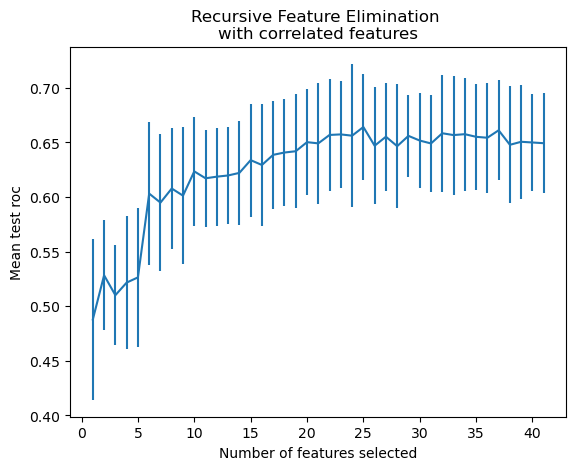

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test roc")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

Applying RFECV with XGBClassifier

In [31]:
#RFECV with XGBoost

from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = XGBClassifier(n_estimators=500)
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="roc_auc",
    min_features_to_select=min_features_to_select,
    n_jobs=-1,
)
rfecv.fit(X_train, y_train)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 7


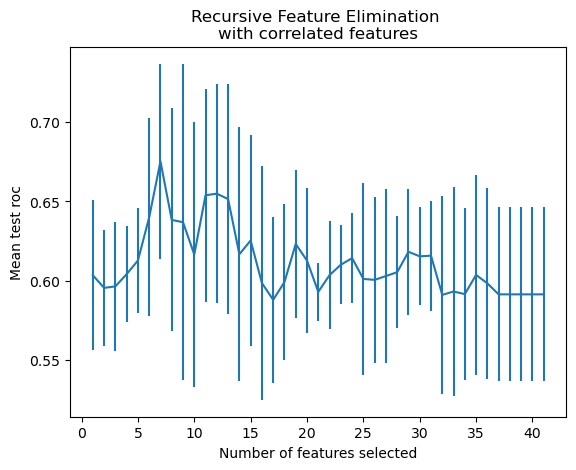

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

cv_results = pd.DataFrame(rfecv.cv_results_)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test roc")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()

Feature selection with Lasso and hyperparameter tuning

In [50]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

# Load data
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')

# Drop unnecessary columns
df = df.drop(['height', 'weight'], axis=1)

# Impute missing values
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['wbc'] = df['wbc'].fillna(df['wbc'].mean())
df['bili'] = df['bili'].fillna(df['bili'].mean())

# Split into features and label
X = df.drop(['id', 'pep'], axis=1)
y = df['pep']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=14)

# Standardize numerical variables
numerical_cols = ['age', 'wbc', 'bili', 'cbddia', 'bmi']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Feature selection using Lasso regression
lasso = Lasso(alpha=0.1)  # Adjust alpha for regularization strength
lasso.fit(X_train, y_train)
feature_selector = SelectFromModel(lasso, prefit=True, threshold=-np.inf) #fit_params={"X": X_train})
X_train_reduced = feature_selector.transform(X_train)
X_test_reduced = feature_selector.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3, 0.6, 1],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 250, 500],
    'subsample': [0.1,0.4, 0.7, 1.0],
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train_reduced, y_train)
best_model = random_search.best_estimator_
print('Randomized search best params:', random_search.best_params_)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))




c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Randomized search best params: {'subsample': 0.4, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}
accuracy: 0.8515406162464986
recall: 0.0196078431372549
precision: 0.25
roc: 0.5049019607843137
[[303   3]
 [ 50   1]]


RFE plus SMOTE

In [51]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')

# Drop unnecessary columns
df = df.drop(['height', 'weight'], axis=1)

# Impute missing values
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['wbc'] = df['wbc'].fillna(df['wbc'].mean())
df['bili'] = df['bili'].fillna(df['bili'].mean())

# Split into features and label
X = df.drop(['id', 'pep'], axis=1)
y = df['pep']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize numerical variables
numerical_cols = ['age', 'wbc', 'bili', 'cbddia', 'bmi']
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Feature selection using RFE
estimator = LogisticRegression()  # You can use any suitable estimator
rfe = RFE(estimator, n_features_to_select=None, step=1)  # Adjust n_features_to_select if needed
rfe.fit(X_train_resampled, y_train_resampled)
X_train_reduced = rfe.transform(X_train_resampled)
X_test_reduced = rfe.transform(X_test)

# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.2, 0.5, 0.7, 1.0],
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=300, cv=5, scoring='roc_auc')
random_search.fit(X_train_reduced, y_train_resampled)
best_model = random_search.best_estimator_
print('Best parameters:', random_search.best_params_)
# Make predictions
y_pred = best_model.predict(X_test_reduced)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(
c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 144 is smaller than n_iter=300. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
accuracy: 0.8095238095238095
recall: 0.1702127659574468
precision: 0.21621621621621623
roc: 0.5383321894303363
[[281  29]
 [ 39   8]]


c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Manual feature selection plus SMOTE

In [52]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')

# Split into features and label
X = df[['pdcan', 'difcan', 'secnkfcan', 'sphincterotomy', 'indstric', 'pnkfcan', 'cbddia']]
y = df['pep']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize numerical variables
numerical_cols = ['cbddia']
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.8],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 200, 300, 600],
    'subsample': [0.2, 0.5, 0.7, 1.0],
}
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train_resampled, y_train_resampled)
best_model = random_search.best_estimator_
print('Best parameters:', random_search.best_params_)
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best parameters: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 8, 'learning_rate': 0.1}
accuracy: 0.6386554621848739
recall: 0.6808510638297872
precision: 0.2191780821917808
roc: 0.6565545641729582
[[196 114]
 [ 15  32]]


Manual feature selection without SMOTE

In [54]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score

# Load data
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')

# Split into features and label
X = df[['pdcan', 'difcan', 'secnkfcan', 'sphincterotomy', 'indstric', 'pnkfcan', 'cbddia']]
y = df['pep']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Standardize numerical variables
numerical_cols = ['cbddia']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5, 0.8],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 200, 300, 600],
    'subsample': [0.2, 0.5, 0.7, 1.0],
}
xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=5, scoring='roc_auc', n_jobs=-1)
random_search.fit(X_train, y_train)
best_model = random_search.best_estimator_
print('Best parameters:', random_search.best_params_)
# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Best parameters: {'subsample': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01}
accuracy: 0.8683473389355743
recall: 0.0
precision: 0.0
roc: 0.5
[[310   0]
 [ 47   0]]


c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


llama proposed code based of l1 feature selection

In [55]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

# Load data
df = pd.read_csv(r'C:\Users\erfan\Desktop\PEP ML\3 1190 after stata\PEPfinal.csv')

# Drop unnecessary columns
df = df.drop(['height', 'weight'], axis=1)

# Impute missing values
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['wbc'] = df['wbc'].fillna(df['wbc'].mean())
df['bili'] = df['bili'].fillna(df['bili'].mean())

# Split into features and label
X = df.drop(['id', 'pep'], axis=1)
y = df['pep']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Standardize numerical variables
numerical_cols = ['age', 'wbc', 'bili', 'cbddia', 'bmi']
scaler = StandardScaler()
X_train_resampled[numerical_cols] = scaler.fit_transform(X_train_resampled[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# L1-based feature selection with GradientBosstingClassigier
gbc = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=14)
gbc.fit(X_train_resampled, y_train_resampled)
selector = SelectFromModel(gbc, threshold=0.05)
support = selector.get_support()
X_train_reduced = X_train_resampled.iloc[:, support]
X_test_reduced = X_test.iloc[:, support]

# Get the selected features
selected_features = selector.get_support(indices=True)
print("Selected features:", X.columns[selected_features])
# Hyperparameter tuning with RandomizedSearchCV
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 8],
    'n_estimators': [100, 200, 300],
    'subsample': [0.2, 0.5, 0.7, 1.0],
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=300, cv=5, scoring='roc_auc')
random_search.fit(X_train_reduced, y_train_resampled)
best_model = random_search.best_estimator_
print('Best parameters:', random_search.best_params_)
# Make predictions
y_pred = best_model.predict(X_test_reduced)

# Evaluate the performance
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('precision:', precision_score(y_test, y_pred))
print('roc:', roc_auc_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\imblearn\over_sampling\_smote\base.py:370: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


Selected features: Index(['smoker', 'cbddia', 'cbdstone', 'stancan', 'pnkfcan', 'secnkfcan'], dtype='object')


c:\Users\erfan\anaconda3\envs\cml\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 144 is smaller than n_iter=300. Running 144 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'subsample': 0.7, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1}
accuracy: 0.7955182072829131
recall: 0.2553191489361702
precision: 0.24
roc: 0.5663692518874399
[[272  38]
 [ 35  12]]
